# Project Description

<p>
 The project focuses on feature selection technique in credit risk dataset with data mining techniques. Real world credit datasets have accumulated large quantities of information about clients and their financial and payment history. Feature selection techniques are used on such high dimensional data to reduce the dimensionality by removing irrelevant and redundant features to improve the predictive accuracy of data mining algorithms. The objective of this work is study the information gain, gain ratio and chi square correlation based feature selection method to reduce the feature dimensionality Information gain measure identifies the entropy value of each specific feature. The amount of information gain or entropy is used to decide whether the feature is selected or deleted.  
</p>



Also we are exploring in this data analysis the behavior of German borrowers

1. for what purpose do German borrowers apply for credit loans?
2. How many jobs do each borrower have?
3. What patterns (if any) determine whether the loan will have a good or bad risk ?
4. which are signficant features based on these we can determine the credit risk?



### importing packages

In [1]:
import numpy as np
import pandas as pd
from random import randint
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time

### Read the data using pandas and analysis data

In [2]:
data=pd.read_csv("german_credit.csv")

In [3]:
data.head(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

## About the dataset

For the categorical value columns

- Number of Unique values in each columns
- Number of missing values in each columns


In [5]:
column_stat={'column_name':[],'unique_values':[],'missing_value':[]}
for i in data.columns:
    dtype=data[i].dtype.__str__()
    if not (dtype.startswith('int') or dtype.startswith('float')):
        column_stat['column_name'].append(str(i))
        column_stat['unique_values'].append(len(data[i].unique()))
        column_stat['missing_value'].append(data[i].isnull().sum())


In [6]:
pd.DataFrame(column_stat)

,column_name,unique_values,missing_value
0,account_check_status,4,0
1,credit_history,5,0
2,purpose,10,0
3,savings,5,0
4,present_emp_since,5,0
5,personal_status_sex,4,0
6,other_debtors,3,0
7,property,4,0
8,other_installment_plans,3,0
9,housing,3,0


- As the Number of unique values in columns not much so we can perform one-hot enconding without reducing the distinct values.otherwise Suppose 200 categories are present in a feature then only those 10 categories which are the top 10 repeating categories will be chosen and one-hot encoding is applied to only those categories or else the number of encoded columns will large which is hard to handle and will take very long time to tune the model.
- The dataset does not have any missing value all column have exactly 1000 values, so no need to perform fill missing value operation.



### Changing Telephone column values

In [7]:
data.telephone.value_counts()

telephone
none                                         596
yes, registered under the customers name     404
Name: count, dtype: int64

As we see in telephone values we have 2 value [`'none'`,`'yes, registered under the customers name'`] we can change them to [`no`, `yes`].

In [8]:
data.telephone=data.telephone.apply(lambda x: 'No' if x=='none' else 'Yes')

In [9]:
data.telephone.value_counts()

telephone
No     596
Yes    404
Name: count, dtype: int64

## Visualize the data

We can find the amount of load taken based on signficant features like
```json
["loan_purpose" , "job_status" , "gender" , "personal_status"]
```
 and try to find out is there any partiality on the data on some specific feature attribute, ex- we have a subset of data on large credit dataset we can find if the data is well distributed on different feature if not we can retake a differnt batch of data on initial training.

### For what purpose most of loan is taken
- in data we have column purpose which stores the reason for loan, we can use this to see aggregate result on which purpose the loan is taken

In [10]:
loan_category={}
grp=data.groupby(by="purpose")
for i,j in grp:
    loan_category[i]=j["credit_amount"].sum()

<BarContainer object of 10 artists>

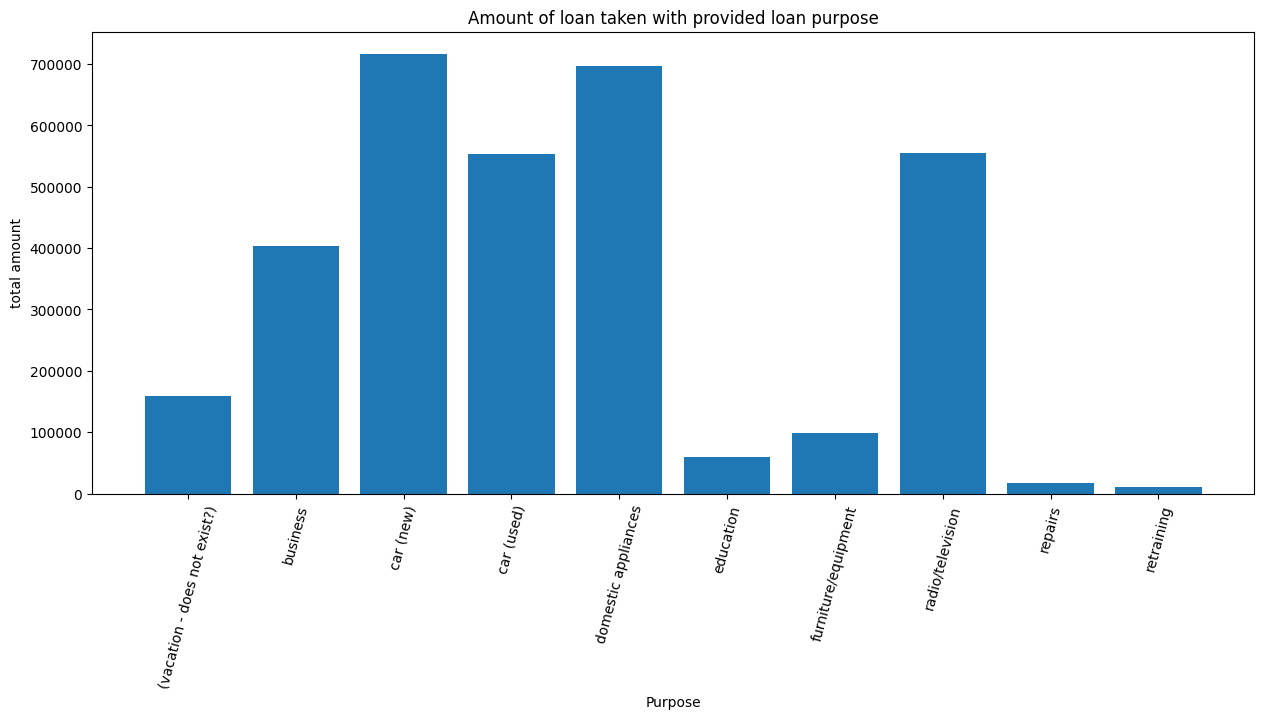

In [11]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=75)
plt.xlabel("Purpose")
plt.ylabel("total amount")
plt.title("Amount of loan taken with provided loan purpose")
plt.bar(loan_category.keys(),loan_category.values())

 - <i> Mostly the loans are taken for buying car or domestic appliances<i> 
 - <i> the loan can taken less likely for education, repair.

### the percentile breakdown on amount of loan in Pie chart

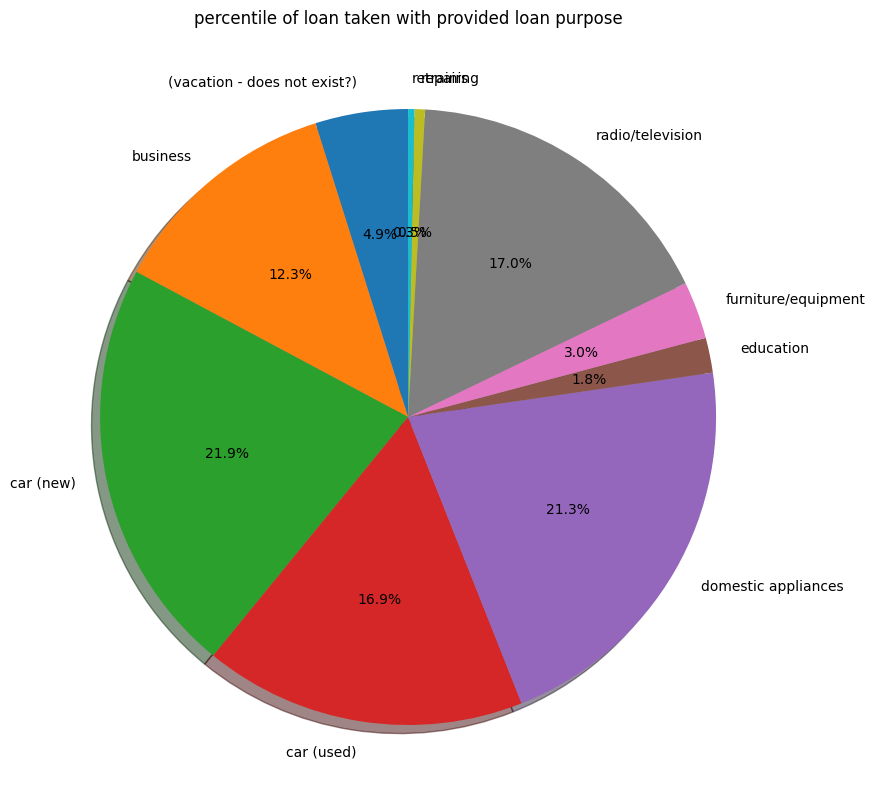

In [12]:
plt.figure(figsize=(20,10))
plt.title("percentile of loan taken with provided loan purpose")
plt.pie(loan_category.values(),labels=loan_category.keys(),autopct='%1.1f%%',shadow=True, startangle=90);

### Find out amount of load based on type persons job status

<BarContainer object of 4 artists>

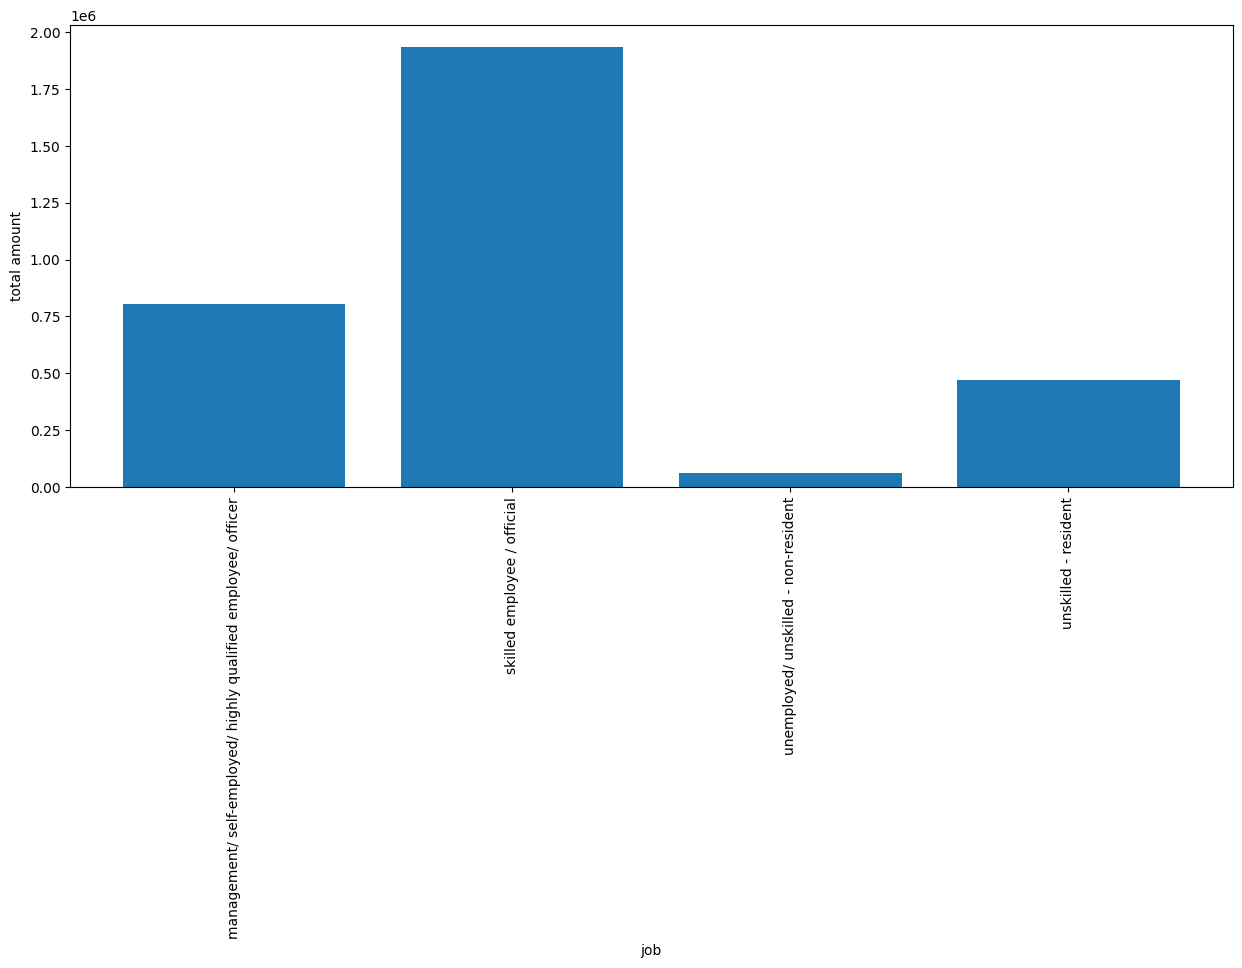

In [13]:
jobs=data.groupby("job")
job_category={}
for i,j in jobs:
    job_category[i]=j["credit_amount"].sum()


plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.xlabel("job")
plt.ylabel("total amount")
plt.bar(job_category.keys(),job_category.values())

- based on this chart we concluded the most amount of credit distibuted to skilled employee

### separate gender and personal status value from personal_status_sex column
- the personal status sex is comined of 2 values gender and personal status
- we need to split the column in 2 parts (gender and status)

In [14]:
print(data.personal_status_sex.value_counts())
personal_status_sex=data.personal_status_sex.str.split(":",expand=True)

personal_status_sex
male : single                          548
female : divorced/separated/married    310
male : married/widowed                  92
male : divorced/separated               50
Name: count, dtype: int64


In [15]:
gender=personal_status_sex.iloc[:,0].apply(lambda x: 1 if x.strip()=='male' else 0)
status=personal_status_sex.iloc[:,1]

In [16]:
data["gender"]=gender
data["personal_status"]=status
data.drop(columns=["personal_status_sex"],inplace=True)

In [17]:
print("Gender\n",data.gender.value_counts())
print("\n\n")
print("Personal status\n",data.personal_status.value_counts())

Gender
 gender
1    690
0    310
Name: count, dtype: int64



Personal status
 personal_status
 single                        548
 divorced/separated/married    310
 married/widowed                92
 divorced/separated             50
Name: count, dtype: int64


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   other_debtors               1000 non-null   object
 10  present_res_since           1000 non-null   int64 
 11  property                    1000 non-null   object
 12  age                         1000 non-null   int64 
 13  other_installment_plans     1000 non-null   objec

### Expanding categorical values in the dataset
- one-hot encoding to the categorical value columns

In [19]:
def dummy_df(df,todummy_list):
    """
    the function takes data frame and list of columns for which one hot encoding need to perform
    for each column it finds the one-hot encoding and add them in the dataframe and removes the old column
    """
    for x in todummy_list:
        dummies=pd.get_dummies(df[x],prefix=x,dummy_na=False)
        df=df.drop(x,axis=1)
        df=pd.concat([df,dummies],axis=1)
    return df

In [20]:
todummy_list=['account_check_status','credit_history','purpose','savings','present_emp_since','personal_status','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker']

In [21]:
encoded_data=dummy_df(data,todummy_list)

In [22]:
encoded_data.head(2)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,gender,account_check_status_0 <= ... < 200 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_No,telephone_Yes,foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,1,False,...,True,False,False,True,False,False,False,True,False,True
1,1,48,5951,2,2,22,1,1,0,True,...,True,False,False,True,False,False,True,False,False,True


In [23]:
encoded_data.shape

(1000, 63)

In [24]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 63 columns):
 #   Column                                                                      Non-Null Count  Dtype
---  ------                                                                      --------------  -----
 0   default                                                                     1000 non-null   int64
 1   duration_in_month                                                           1000 non-null   int64
 2   credit_amount                                                               1000 non-null   int64
 3   installment_as_income_perc                                                  1000 non-null   int64
 4   present_res_since                                                           1000 non-null   int64
 5   age                                                                         1000 non-null   int64
 6   credits_this_bank                                                

### Building models

In [25]:
from sklearn.cluster import KMeans;
from sklearn.decomposition import PCA; 
from sklearn.preprocessing import normalize;

- default column in dataset contains the is the credit is defaulter or not
- will use y variable to store it (for future reference y stores the label or the output)

In [26]:
y=encoded_data['default'].copy()

In [27]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [28]:
encoded_data.drop('default',axis=1,inplace=True)

### find the numeric columns values and normalize their values from range 0 to 1
- We normalize values to bring them into a common scale, making it easier to compare and analyze data. Normalization also helps to reduce the impact of outliers and improve the accuracy and stability of statistical models.

In [29]:
encoded_data.select_dtypes(include=['int64','float64'])

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,gender
0,6,1169,4,4,67,2,1,1
1,48,5951,2,2,22,1,1,0
2,12,2096,2,3,49,1,2,1
3,42,7882,2,4,45,1,2,1
4,24,4870,3,4,53,2,2,1
...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0
996,30,3857,4,4,40,1,1,1
997,12,804,4,4,38,1,1,1
998,45,1845,4,4,23,1,1,1


In [30]:
# the below columns are the numeric columns in the dataframe
numvars = ['credit_amount', 'duration_in_month', 'installment_as_income_perc', 'present_res_since', 'age', 
           'credits_this_bank', 'people_under_maintenance']



In [31]:
# Standardization
numdata_std = pd.DataFrame(MinMaxScaler().fit_transform(encoded_data[numvars]),columns=numvars)

In [32]:
numdata_std.head()

,credit_amount,duration_in_month,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
0,0.050567,0.029412,1.000000,1.000000,0.857143,0.333333,0.0
1,0.313690,0.647059,0.333333,0.333333,0.053571,0.000000,0.0
2,0.101574,0.117647,0.333333,0.666667,0.535714,0.000000,1.0
3,0.419941,0.558824,0.333333,1.000000,0.464286,0.000000,1.0
4,0.254209,0.294118,0.666667,1.000000,0.607143,0.333333,1.0


In [33]:
encoded_data[numvars] = numdata_std

## split the data by training and testing split

- we have data where the numerical column has normalized and the one-hot encoding applied for categorical columns and it is ready to train in a model

In [34]:
from sklearn.model_selection import train_test_split

# X will represent the input data to the model and y wll represent the output data
x=encoded_data

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=25,test_size=0.25)

In [36]:
y_train.value_counts(normalize=True)

default
0    0.698667
1    0.301333
Name: proportion, dtype: float64

### creating a decision tree classifier to find the credit defaulter

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt=DecisionTreeClassifier(random_state=6,max_depth=14)

In [39]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=14, random_state=6)

In [40]:
# accuracy on test data
dt.score(x_test,y_test)

0.708

In [41]:
# accuracy on training data
dt.score(x_train,y_train)

0.996

In [42]:
train_acc=[]
test_acc=[]
for depth in range(1,20):
    dt=DecisionTreeClassifier(max_depth=depth,random_state=10)
    dt.fit(x_train,y_train)
    train_acc.append(dt.score(x_train,y_train))
    test_acc.append(dt.score(x_test,y_test))


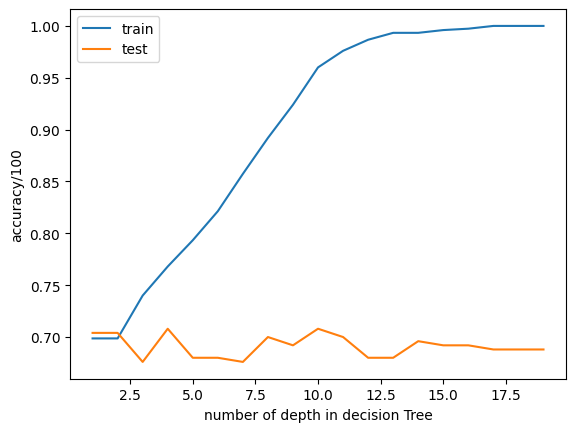

In [43]:
plt.plot(range(1,20),train_acc)
plt.plot(range(1,20),test_acc)
plt.xlabel('number of depth in decision Tree')
plt.ylabel('accuracy/100')
plt.legend(['train','test'])

- The above plot represents when we increase the number of depth in Decision tree the accuracy change with respect to depth 

### visualize the Decision tree

In [44]:
from sklearn import tree

In [45]:
tree.export_graphviz(dt,out_file='tree.dot',feature_names=x_train.columns,max_depth=2,filled=True)

In [46]:
import subprocess
import warnings
from graphviz import Source
proc=subprocess.Popen(["dot","-V"],stdout=subprocess.PIPE,stderr=subprocess.PIPE,shell=True)
(out,err)=proc.communicate()
# in case of error the return code will be non zero value
if proc.returncode:
    print("Error while checking dot package: ",err)
    warnings.warn("the dot package not added in path follow https://graphviz.readthedocs.io/en/stable/manual.html#installation to install to visualize the decision tree")
else:
    graph=Source.from_file("./tree.dot",format='png')
    graph.view()

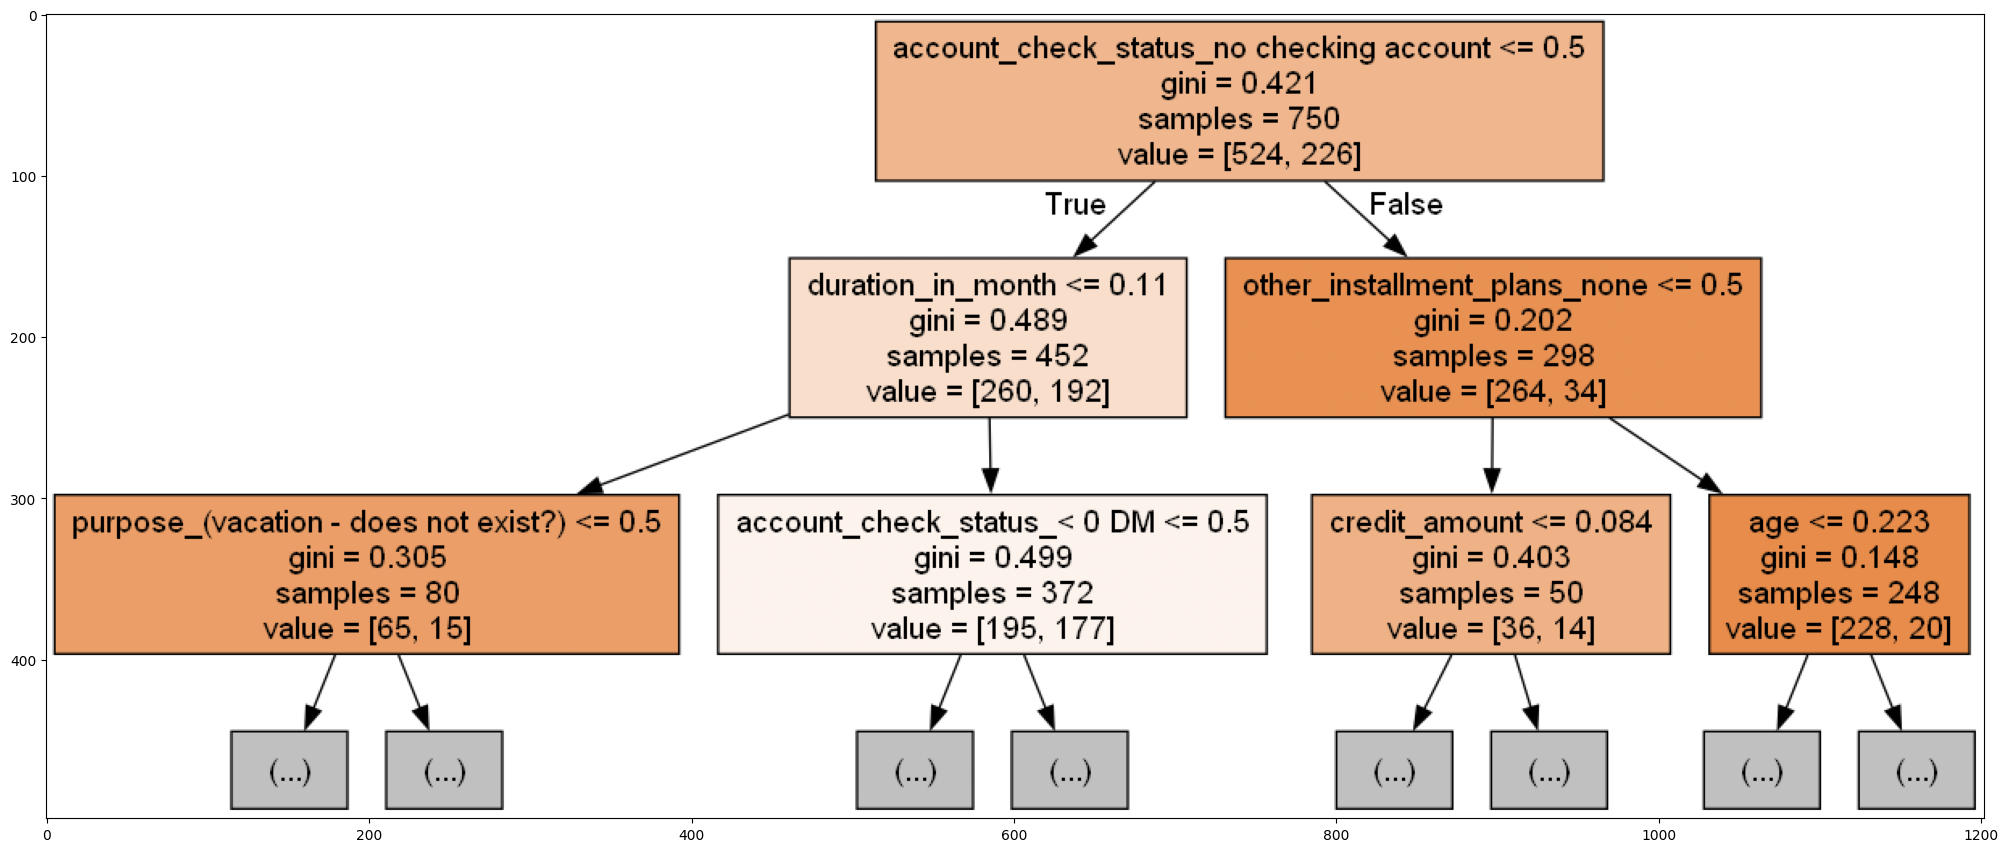

In [47]:
image=plt.imread('tree.dot.png')
plt.figure(figsize=(25,25))
plt.imshow(image)

In [48]:
x.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,gender,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_No,telephone_Yes,foreign_worker_no,foreign_worker_yes
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,1,False,True,...,True,False,False,True,False,False,False,True,False,True
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,0,True,False,...,True,False,False,True,False,False,True,False,False,True
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,1,False,False,...,True,False,False,False,False,True,True,False,False,True
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,1,False,True,...,False,False,False,True,False,False,True,False,False,True
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,1,False,True,...,False,False,False,True,False,False,True,False,False,True


In [49]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,dt.predict(x_test)))

[[139  37]
 [ 41  33]]


## Feature selection technique 
- to reduce the feature which are not contributing much info to the default relation

### steps

1. will remove the column which are nearly constant by using `VarianceThreshold` 
2. select subset of data using mutual information (which measures the dependency between the variables)  and compare the accuracy.
3. select subset of data using gain ration and compare the accuracy.
4. select subset of data using chi-square correlation and compare the accuracy.

In [50]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [51]:
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif,mutual_info_regression
from sklearn.feature_selection import SelectPercentile

In [52]:
def remove_constant(features):
    constant_filter=VarianceThreshold(threshold=0)
    constant_filter.fit(features)
    concol = [column for column in features.columns 
          if column not in features.columns[constant_filter.get_support()]]
    return concol

In [53]:
constant_columns=remove_constant(x_train[numvars])
print("these columns are constant and not verying much: ",constant_columns)
x_train.drop(constant_columns,axis=1,inplace=True)
x_test.drop(constant_columns,axis=1,inplace=True)


these columns are constant and not verying much:  []


- we see no column is constant and everthing has some variation, we can increase the threshold to drop some quasi-constants

## finding how columns are realted to each other using information gain
- Finding the mutual information it finds how likely the uncertanity will reduced by knowing value of one column

In [54]:
mi=mutual_info_classif(x_train,y_train)
print(len(mi))

62


<Axes: >

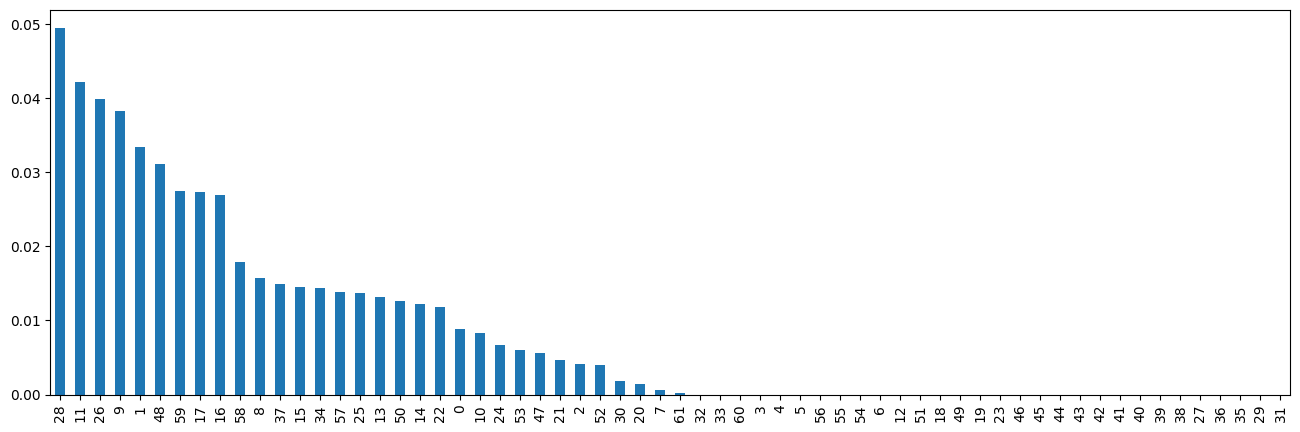

In [55]:
mi=pd.Series(mi)
mi.sort_values(ascending=False,inplace=True)
mi.plot.bar(figsize=(16,5))

In the above plot we see around 50% feature does not have much dependency, so we can ignore them and take only the columns which has higher correlation, we can select top 30% of features as they majorly correlated.

In [56]:
sel=SelectPercentile(mutual_info_classif,percentile=30).fit(x_train,y_train)
selected_columns=x_train.columns[sel.get_support()]

In [57]:
print("columns which have high correlation")
print(selected_columns)
print("="*30,"column diffrence",'='*30)
print(f"Earlier the dataset has {len(x_train.columns)} columns but not it is reduced to {len(selected_columns)} columns")

columns which have high correlation
Index(['duration_in_month', 'credit_amount', 'installment_as_income_perc',
       'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account', 'purpose_car (new)',
       'purpose_car (used)', 'savings_.. >= 1000 DM ', 'savings_... < 100 DM',
       'savings_100 <= ... < 500 DM', 'savings_unknown/ no savings account',
       'personal_status_ divorced/separated',
       'personal_status_ divorced/separated/married',
       'property_if not A121 : building society savings agreement/ life insurance',
       'property_real estate', 'property_unknown / no property',
       'other_installment_plans_bank', 'housing_rent'],
      dtype='object')
============================== column diffrence ==============================
Earlier the dataset has 62 columns but not it is reduced to 19 columns


In [58]:
def DecisionTreeBuild(x_train,y_train,x_test,y_test, plot=True,plot_title=""):
    """
    this method creates decision tree model with different depth and track its accuray and plots graph 
    """
    train_acc=[]
    test_acc=[]
    for depth in range(5,20):
        dt=DecisionTreeClassifier(max_depth=depth,random_state=int(randint(5,50)))
        dt.fit(x_train,y_train)
        train_acc.append(dt.score(x_train,y_train))
        test_acc.append(dt.score(x_test,y_test))
    if plot:
        plt.plot(range(5,20),train_acc)
        plt.plot(range(5,20),test_acc)
        plt.xlabel("depth of decision tree")
        plt.ylabel("accuracy")
        if plot_title:
            plt.title(plot_title)
        plt.legend(['train','test'])
    return train_acc,test_acc
def get_time_for_nth_run_decision_tree(x_train,y_train,x_test,y_test,no_of_run):
    s=time.time()
    for i in range(no_of_run):
        DecisionTreeBuild(x_train,y_train,x_test,y_test,plot=False)
    return time.time()-s

In [59]:
# creating variables x_train_mi and x_test_mi these will contain the subset of columns which has reduced by information gain value,
# and the x_train and x_test will contain all of the data from dataset
x_train_mi=x_train[selected_columns]
x_test_mi=x_test[selected_columns]

total_size of dataset: 35.16  MB
total time required for run 100 times decision tree algorithm: 0.10 second


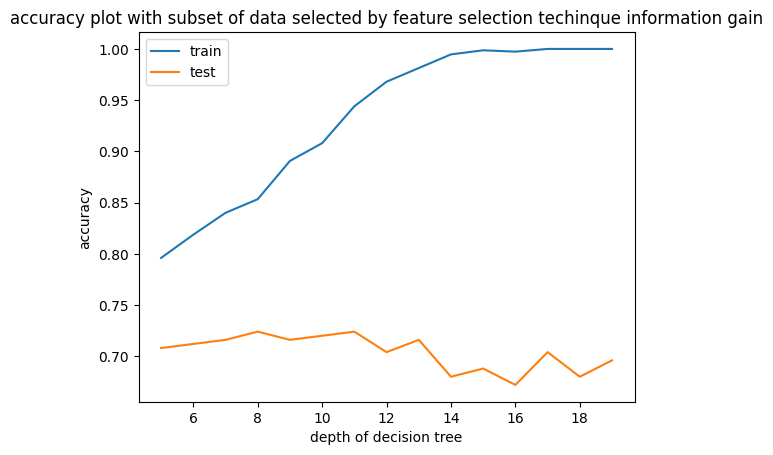

In [60]:
total_size_of_data_in_memory_in_information_gain_fs = x_train_mi.memory_usage().sum()/2**10
avg_time_to_train_in_dt_information_gain_fs = get_time_for_nth_run_decision_tree(x_train_mi,y_train,x_test_mi,y_test,100) /100
print("total_size of dataset: %.2f"%(total_size_of_data_in_memory_in_information_gain_fs)," MB")
print("total time required for run 100 times decision tree algorithm: %.2f second"%(avg_time_to_train_in_dt_information_gain_fs))
_,x_test_accuracy_on_fs_information_gain=DecisionTreeBuild(x_train_mi,y_train,x_test_mi,y_test,plot=True,plot_title="accuracy plot with subset of data selected by feature selection techinque information gain")

total_size of dataset: 92.29  MB
total time required for run 100 times decision tree algorithm: 0.16 second


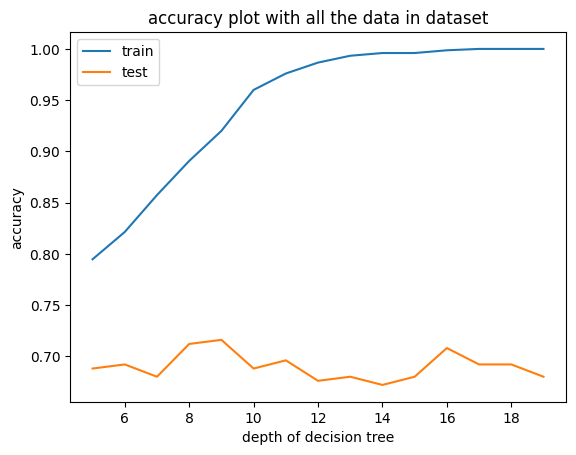

In [61]:
total_size_of_data_in_memory= x_train.memory_usage().sum()/2**10
avg_time_to_train_in_dt = get_time_for_nth_run_decision_tree(x_train,y_train,x_test,y_test,100) /100
print("total_size of dataset: %.2f"%(total_size_of_data_in_memory)," MB")
print("total time required for run 100 times decision tree algorithm: %.2f second"%(avg_time_to_train_in_dt))
_,x_test_accuracy_on_data=DecisionTreeBuild(x_train,y_train,x_test,y_test,plot=True,plot_title="accuracy plot with all the data in dataset")


from the above 2 figure we can see that we have reduced the data size by half and stil we get the same accuracy in both traning and test set with out affecting the model

### validation with Logistic Regression model

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
def logistic_model_build(x_train,y_train,x_test,y_test):
    lr =  LogisticRegression(random_state=int(randint(5,50)),solver='liblinear',max_iter=10**4)
    model=lr.fit(x_train,y_train)
    return model

def get_time_for_nth_run_logistic_regression(x_train,y_train,x_test,y_test,no_of_run):
    s=time.time()
    for i in range(no_of_run):
        model=logistic_model_build(x_train,y_train,x_test,y_test)
        model.score(x_test,y_test)
    return time.time()-s

checking model accuracy with information gain feature selection technique

In [64]:
model=logistic_model_build(x_train_mi,y_train,x_test_mi,y_test)
accuracy= model.score(x_test_mi,y_test)
print("accuracy of model on test data which is tranined using subset of data found usind information gain is ",accuracy*100)
avg_time_to_train_in_information_gain_fs_logistic_reg = get_time_for_nth_run_logistic_regression(x_train_mi,y_train,x_test_mi,y_test,100)/100
print("avg time took to run the model on subset of data selected by information gain is:",avg_time_to_train_in_information_gain_fs_logistic_reg)


accuracy of model on test data which is tranined using subset of data found usind information gain is  75.6
avg time took to run the model on subset of data selected by information gain is: 0.00327803373336792


### with out Feature extraction

In [65]:
model=logistic_model_build(x_train,y_train,x_test,y_test)
accuracy= model.score(x_test,y_test)
print("accuracy of model with all data ",accuracy*100)
avg_time_to_train_in_logistic_reg = get_time_for_nth_run_logistic_regression(x_train,y_train,x_test,y_test,100)/100
print("avg time took to run the model on all data:",avg_time_to_train_in_logistic_reg)


accuracy of model with all data  72.8
avg time took to run the model on all data: 0.0054531097412109375


## gain ratio Feature Extraction

we will use the below information to calculate the gain ratio
 
<h5> <i>gain_ratio(A) <b>=</b> Gain(A) / split_info(A)</i></h5>

<h5> split_info(A) = (D<sub>j</sub>)/ D *  log<sub>2</sub>(<sup>D<sub>j</sub>/ D</sup>) <h5>

<h5> Gain(A) = info(D)- info<sub>Age</sub> (D) </h5>

In [66]:
from info_gain import info_gain

In [67]:
d={}
columns=x_train.columns
for i in range(x_train.shape[1]):
    d[i]=info_gain.info_gain_ratio(x_train[columns[i]].values,y_train)

In [68]:
temp=sorted(d,key= lambda x: d[x],reverse=True)
gain_value=[]
gain_key=[]
for i in temp:
    gain_key.append(i)
    gain_value.append(d[i])

<BarContainer object of 62 artists>

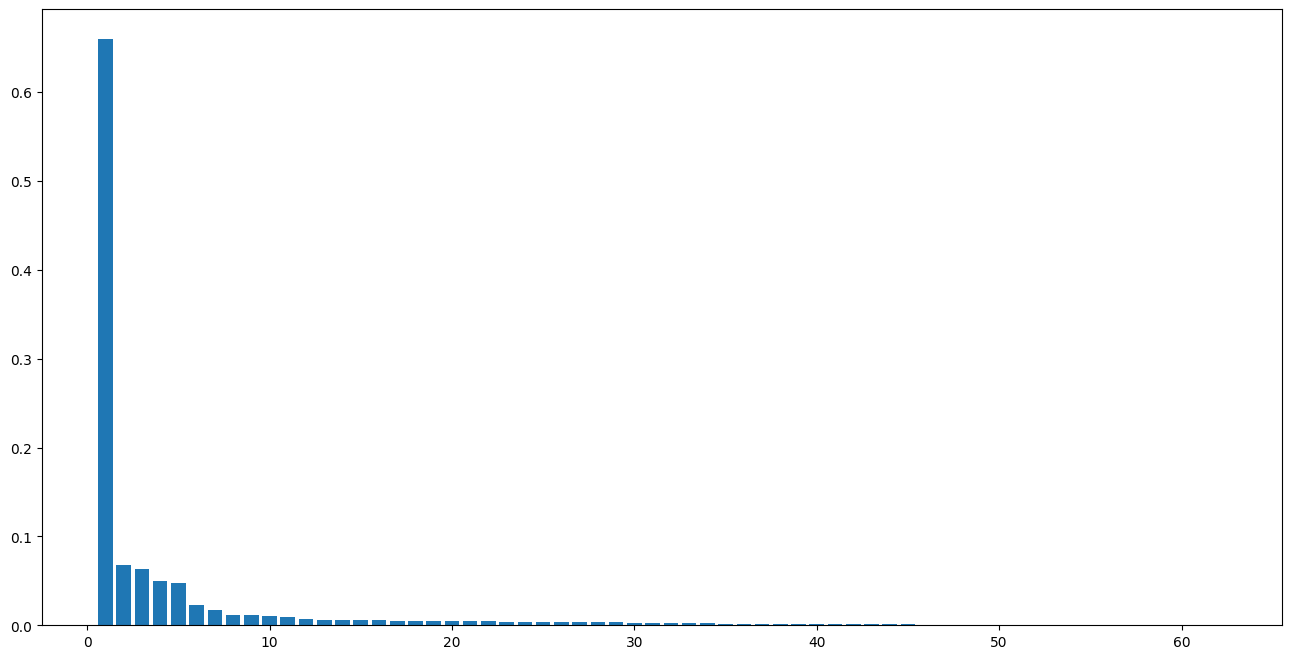

In [69]:
plt.figure(figsize=(16,8))
plt.bar(range(1,63),gain_value)

- much Feature are not contribute enough information. Now we select 10 attibute.

In [70]:
print('\n'.join(x_train.iloc[:,gain_key[:10]].columns))

credit_amount
account_check_status_no checking account
duration_in_month
age
account_check_status_< 0 DM
credit_history_critical account/ other credits existing (not at this bank)
savings_... < 100 DM
credit_history_no credits taken/ all credits paid back duly
savings_unknown/ no savings account
housing_own


In [71]:
x_train_fs=x_train.iloc[:,gain_key[:10]]
x_test_fs=x_test.iloc[:,gain_key[:10]]

total_size of dataset: 28.56  MB
average time required for run 100 times decision tree algorithm: 0.09 second


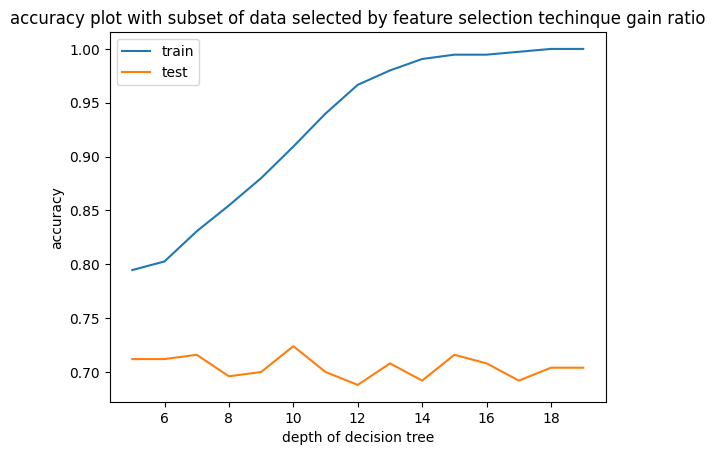

In [72]:
total_size_of_data_in_memory_in_gain_ratio_fs = x_train_fs.memory_usage().sum()/2**10
avg_time_to_train_in_dt_gain_ratio_fs = get_time_for_nth_run_decision_tree(x_train_fs,y_train,x_test_fs,y_test,100) /100
print("total_size of dataset: %.2f"%(total_size_of_data_in_memory_in_gain_ratio_fs)," MB")
print("average time required for run 100 times decision tree algorithm: %.2f second"%(avg_time_to_train_in_dt_gain_ratio_fs))
_,x_test_accuracy_on_fs_gain_ratio=DecisionTreeBuild(x_train_fs,y_train,x_test_fs,y_test,plot=True,plot_title="accuracy plot with subset of data selected by feature selection techinque gain ratio")

### accuracy curve without feature selection

total_size of dataset: 92.29  MB
total time required for run 100 times decision tree algorithm: 0.16 second


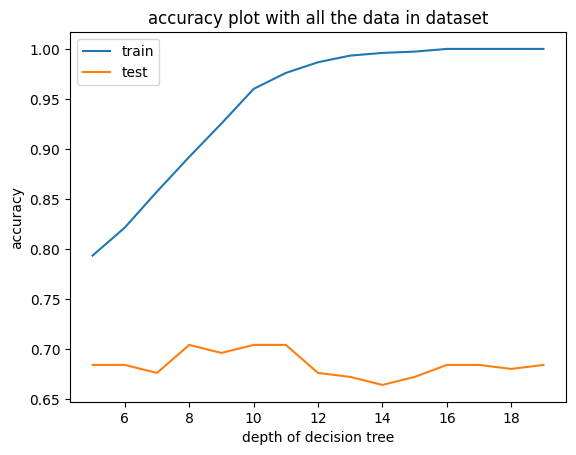

In [73]:
total_size_of_data_in_memory= x_train.memory_usage().sum()/2**10
avg_time_to_train_in_dt = get_time_for_nth_run_decision_tree(x_train,y_train,x_test,y_test,100) /100
print("total_size of dataset: %.2f"%(total_size_of_data_in_memory)," MB")
print("total time required for run 100 times decision tree algorithm: %.2f second"%(avg_time_to_train_in_dt))
_,x_test_accuracy_on_data=DecisionTreeBuild(x_train,y_train,x_test,y_test,plot=True,plot_title="accuracy plot with all the data in dataset")


### validation with Logistic Regression model

In [74]:
model=logistic_model_build(x_train_fs,y_train,x_test_fs,y_test)
accuracy= model.score(x_test_fs,y_test)
print("accuracy of model on test data which is tranined using subset of data found using gain ratio is ",accuracy*100)
avg_time_to_train_in_gain_ratio_fs_logistic_reg = get_time_for_nth_run_logistic_regression(x_train_fs,y_train,x_test_fs,y_test,100)/100
print("avg time took to run the model on subset of data selected by information gain is:",avg_time_to_train_in_gain_ratio_fs_logistic_reg)


accuracy of model on test data which is tranined using subset of data found using gain ratio is  72.8
avg time took to run the model on subset of data selected by information gain is: 0.0031394004821777345


In [75]:
model=logistic_model_build(x_train,y_train,x_test,y_test)
accuracy= model.score(x_test,y_test)
print("accuracy of model with all data ",accuracy*100)
avg_time_to_train_in_logistic_reg = get_time_for_nth_run_logistic_regression(x_train,y_train,x_test,y_test,100)/100
print("avg time took to run the model on all data:",avg_time_to_train_in_logistic_reg)


accuracy of model with all data  72.8
avg time took to run the model on all data: 0.005617392063140869


## Chi Square correlation

- it is used to check if two categorical variables are related or independent

In [76]:
from sklearn.feature_selection import chi2

In [77]:
chi_scores = chi2(x_train,y_train)
p_values = pd.Series(chi_scores[1],index = x.columns)
p_values.sort_values(ascending = False , inplace = True)

<Axes: >

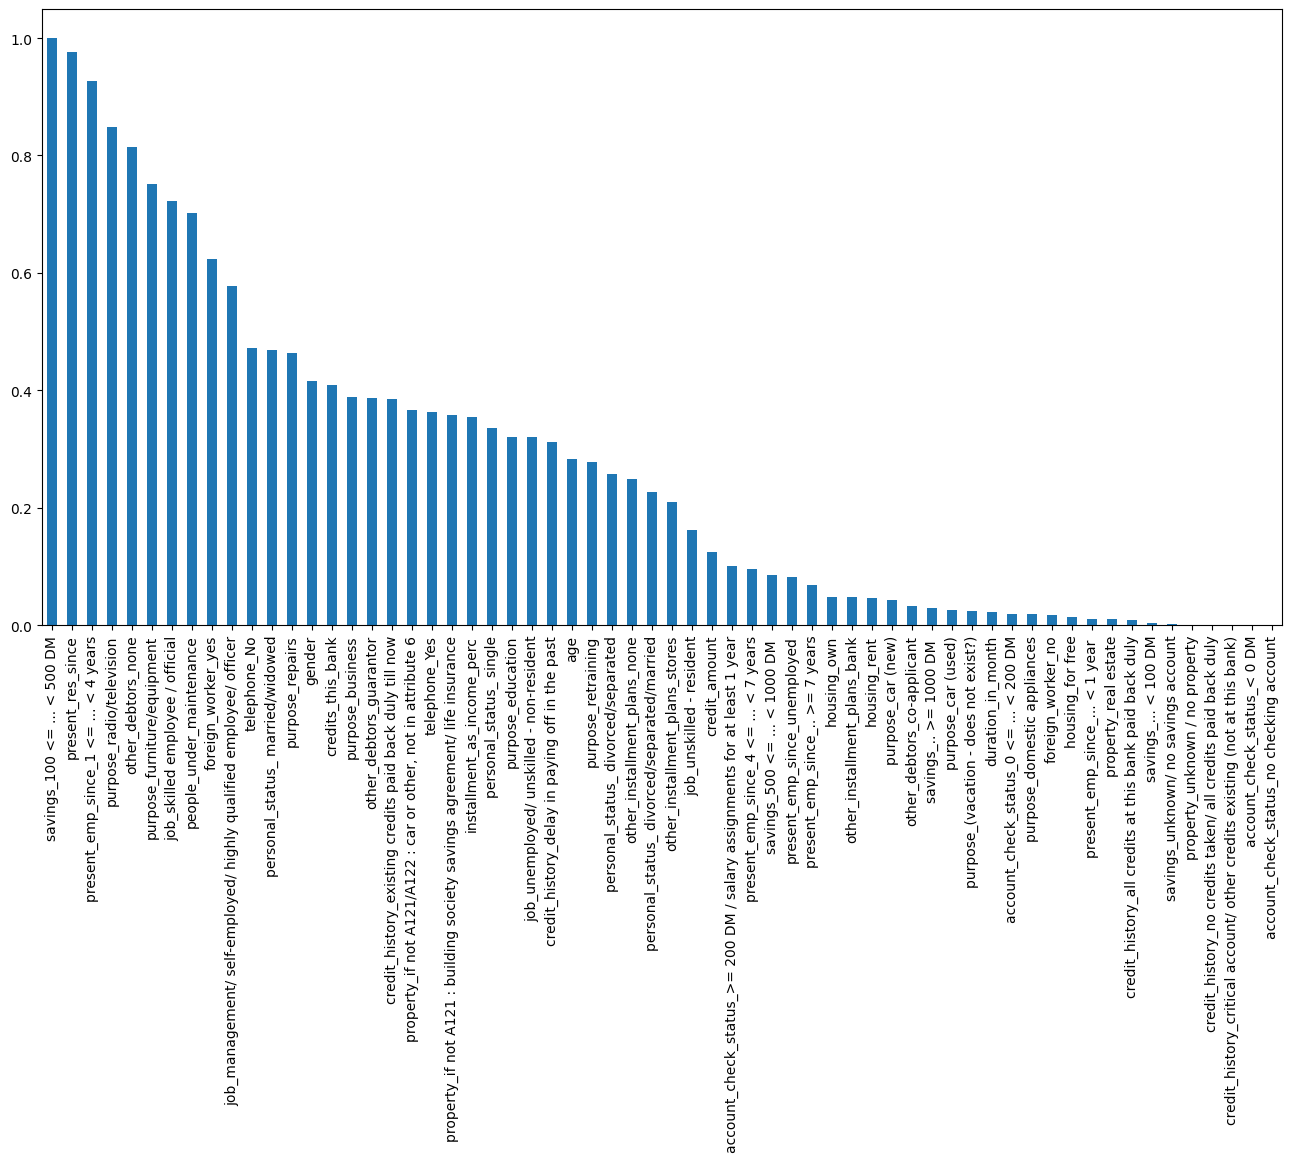

In [78]:
plt.figure(figsize=(16,8))
p_values.plot.bar()

- we can select around 50% of features which are based on higher corelation

In [79]:
sel=SelectPercentile(chi2,percentile=50).fit(x_train,y_train)
filterd_columns=x_train.columns[sel.get_support()]

In [80]:
x_train_chi=x_train[filterd_columns]
x_test_chi=x_test[filterd_columns]

total_size of dataset: 28.56  MB
average time required for run 100 times decision tree algorithm: 0.11 second


([0.7973333333333333,
  0.8133333333333334,
  0.832,
  0.856,
  0.876,
  0.8986666666666666,
  0.9186666666666666,
  0.9466666666666667,
  0.96,
  0.9706666666666667,
  0.9826666666666667,
  0.988,
  0.992,
  0.9973333333333333,
  0.9986666666666667],
 [0.712,
  0.716,
  0.724,
  0.708,
  0.684,
  0.72,
  0.736,
  0.732,
  0.728,
  0.704,
  0.688,
  0.704,
  0.704,
  0.68,
  0.688])

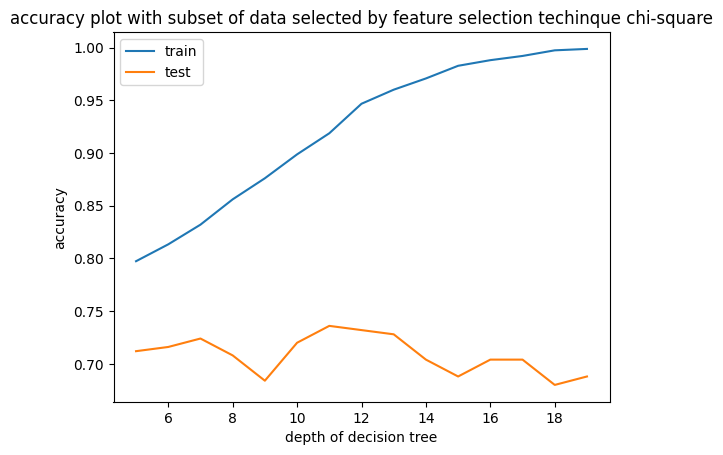

In [81]:
total_size_of_data_in_memory_in_chi_fs = x_train_fs.memory_usage().sum()/2**10
avg_time_to_train_in_dt_chi_fs = get_time_for_nth_run_decision_tree(x_train_chi,y_train,x_test_chi,y_test,100) /100
print("total_size of dataset: %.2f"%(total_size_of_data_in_memory_in_chi_fs)," MB")
print("average time required for run 100 times decision tree algorithm: %.2f second"%(avg_time_to_train_in_dt_chi_fs))
DecisionTreeBuild(x_train_chi,y_train,x_test_chi,y_test,plot=True,plot_title="accuracy plot with subset of data selected by feature selection techinque chi-square")

### Accuracy curve without feature selection

total_size of dataset: 92.29  MB
total time required for run 100 times decision tree algorithm: 0.16 second


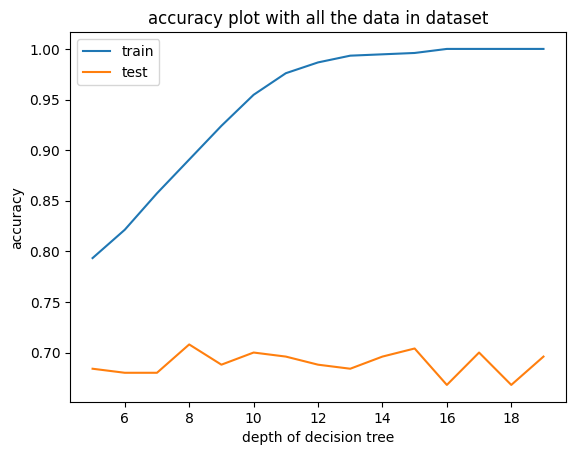

In [82]:
total_size_of_data_in_memory= x_train.memory_usage().sum()/2**10
avg_time_to_train_in_dt = get_time_for_nth_run_decision_tree(x_train,y_train,x_test,y_test,100) /100
print("total_size of dataset: %.2f"%(total_size_of_data_in_memory)," MB")
print("total time required for run 100 times decision tree algorithm: %.2f second"%(avg_time_to_train_in_dt))
_,x_test_accuracy_on_fs_chi=DecisionTreeBuild(x_train,y_train,x_test,y_test,plot=True,plot_title="accuracy plot with all the data in dataset")


### Logistic Regression

In [83]:
model=logistic_model_build(x_train_chi,y_train,x_test_chi,y_test)
accuracy= model.score(x_test_chi,y_test)
print("accuracy of model on test data which is tranined using subset of data found using chi square is ",accuracy*100)
avg_time_to_train_in_chi_fs_logistic_reg = get_time_for_nth_run_logistic_regression(x_train_chi,y_train,x_test_chi,y_test,100)/100
print("avg time took to run the model on subset of data selected by chi square is:", avg_time_to_train_in_chi_fs_logistic_reg)


accuracy of model on test data which is tranined using subset of data found using chi square is  73.2
avg time took to run the model on subset of data selected by chi square is: 0.003694295883178711


In [84]:
model=logistic_model_build(x_train,y_train,x_test,y_test)
accuracy= model.score(x_test,y_test)
print("accuracy of model with all data ",accuracy*100)
avg_time_to_train_in_logistic_reg = get_time_for_nth_run_logistic_regression(x_train,y_train,x_test,y_test,100)/100
print("avg time took to run the model on all data:",avg_time_to_train_in_logistic_reg)


accuracy of model with all data  72.8
avg time took to run the model on all data: 0.005377089977264405



## Comparing memory and time using different models

Text(0, 0.5, 'size in MB')

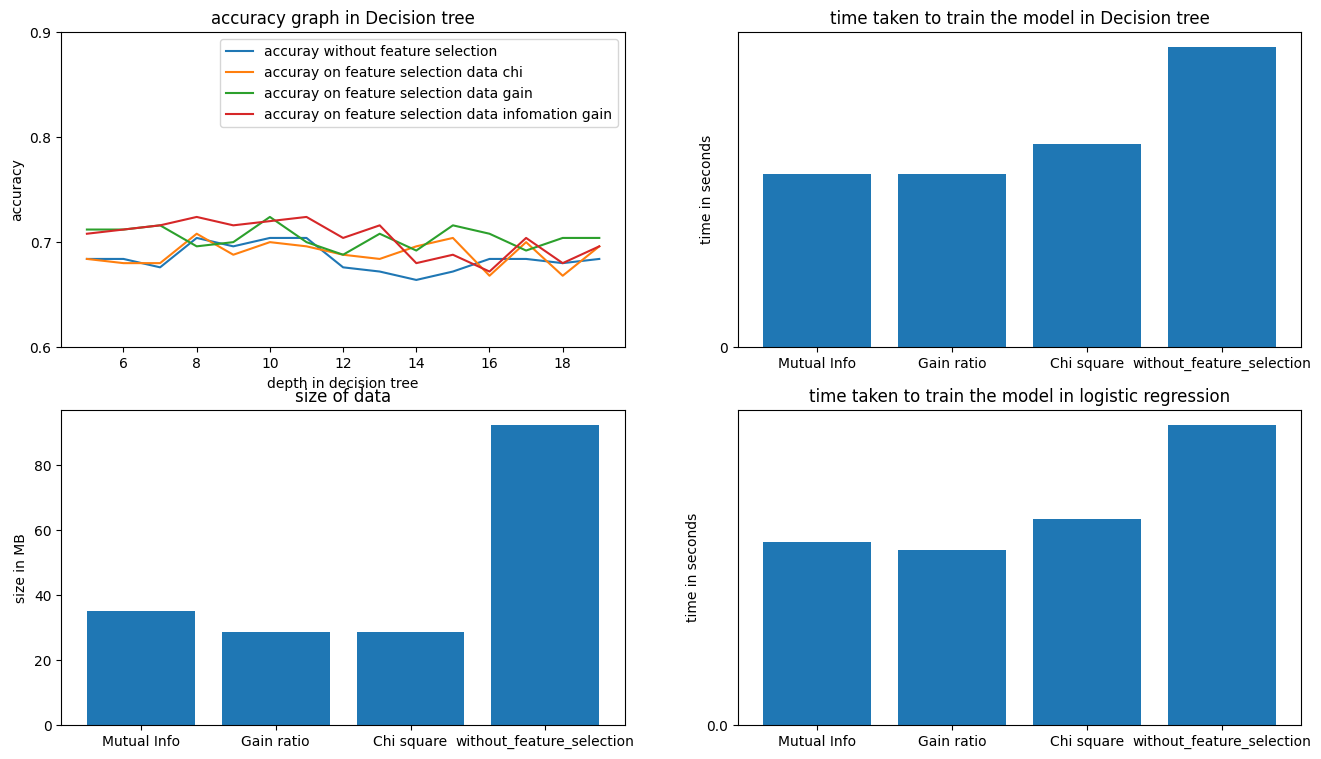

In [85]:
plt.figure(figsize=(16,9))

axes= plt.subplot(221)
axes.yaxis.set_ticks(np.arange(0,50,5))
plt.title("accuracy graph in Decision tree")
plt.plot(np.arange(5,20),x_test_accuracy_on_data)
plt.plot(np.arange(5,20),x_test_accuracy_on_fs_chi)
plt.plot(np.arange(5,20),x_test_accuracy_on_fs_gain_ratio)
plt.plot(np.arange(5,20),x_test_accuracy_on_fs_information_gain)
plt.xlabel("depth in decision tree")
plt.legend(["accuray without feature selection","accuray on feature selection data chi","accuray on feature selection data gain","accuray on feature selection data infomation gain"])

plt.yticks(np.arange(0.6,1.0,0.1))
plt.ylabel('accuracy')
axes=plt.subplot(222)
axes.yaxis.set_ticks(np.arange(0,50,5))
plt.title("time taken to train the model in Decision tree")
plt.bar(['Mutual Info','Gain ratio','Chi square','without_feature_selection'],[avg_time_to_train_in_dt_gain_ratio_fs,avg_time_to_train_in_dt_gain_ratio_fs,avg_time_to_train_in_dt_chi_fs,avg_time_to_train_in_dt])
plt.ylabel('time in seconds')
axes=plt.subplot(224)
axes.yaxis.set_ticks(np.arange(0,1,0.2))
plt.title("time taken to train the model in logistic regression")
plt.bar(['Mutual Info','Gain ratio','Chi square','without_feature_selection'],[avg_time_to_train_in_information_gain_fs_logistic_reg,avg_time_to_train_in_gain_ratio_fs_logistic_reg,avg_time_to_train_in_chi_fs_logistic_reg,avg_time_to_train_in_logistic_reg])
plt.ylabel('time in seconds')
axes=plt.subplot(223)
plt.title("size of data")
plt.bar(['Mutual Info','Gain ratio','Chi square','without_feature_selection'],[total_size_of_data_in_memory_in_information_gain_fs,total_size_of_data_in_memory_in_gain_ratio_fs,total_size_of_data_in_memory_in_chi_fs,total_size_of_data_in_memory])
plt.ylabel('size in MB')


- From the above figure 1 represents the accuracy of model on different data, accuracy test data while model trained on whole data and datas after selecting subset of features with different feature selection technique.
- we can see even after reduce the dataset with different feature selection technique the accuracy on test data not verying much
- figure 2,4 shows time taken by the model to train on different set of data. we see the after applying feature selection technique we can reduce the data size which are taking less time to traing the model.
- figure 3 shows the size of dataset with and without applying feature selection technique, we see by applying feature selection technique we nearly reduced the size of data by half.

<BarContainer object of 4 artists>

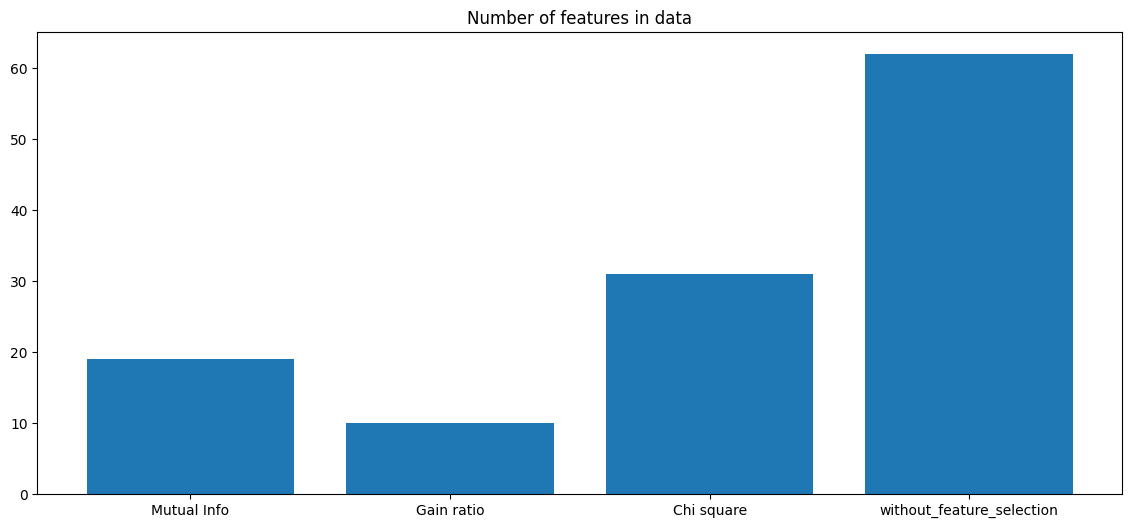

In [86]:
plt.figure(figsize=(14,6))
plt.title("Number of features in data")
plt.bar(['Mutual Info','Gain ratio','Chi square','without_feature_selection'],[len(x_test_mi.columns),len(x_test_fs.columns),len(x_test_chi.columns),len(x_train.columns)])

The above diagram shows the number of features selected to train the model, initially after one-hot encoding we see the dataset has around 60 columns by using the feature selection technique it reduced by at least 50%.

## Conclusion

In this Project we have applied different Feature Selection Technique in german credit dataset and compare with the without feature selection algorithm with performance and time. We have currenty applied mutual information or information gain technique to choose selective features from german credit dataset.
We concluded that some of feature does not contribute much information to the feature so we can remove them with out losing information and make the model faster.
